Javier Francisco Castilla Jiménez
* Ejercicio 1 
* Práctica 1

colaboradores: asesoría grupales de jerónimo

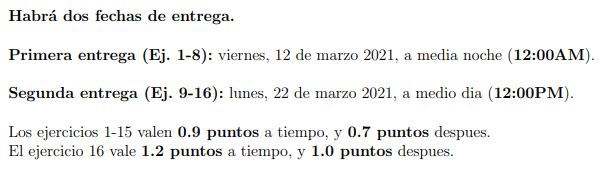

Bootstrap: tomas datos de una condición con repetición, se pueden repetir, pero no se salen de su condición, de forma que mis nuevos datos de una condición x son algunos de la original pero no todos porque estoy repitiendo.

Permutación: no permito repeticiones pero tomo todos los datos y al azar digo quien pertenece a cada condición.


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('Solarize_Light2')

In [2]:
llaves=['1','3','5'] #llaves de neurona
llaves2=['avion','barco','bicicleta','tren'] #llaves de condición#Avión, Barco, Bicicleta, Tren.
pest={llave:1/4 for llave in llaves2}
#cargamos los datos
AG1=nrn.importar('ArchivoG1.csv')
AG3=nrn.importar('ArchivoG3.csv')
AG5=nrn.importar('ArchivoG5.csv')
Arch={'1':np.array(AG1),'3':np.array(AG3),'5':np.array(AG5)}#diccionario de neuronas(datos sínteticos)

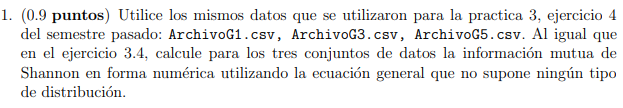

$$ I=\sum_{r,s}P(s)P(r|s)log_{2}(\frac{P(r|s)}{P(r)})$$

In [3]:
#bins para un set de datos
def dbines(datos,nbins=20):
    m,M=(np.min(np.array(datos).flatten()),np.max(np.array(datos).flatten()))#busco min y max de un set de datos #mínimo y máximo
    bins=np.linspace(round(m)-1,round(M)+1,nbins+1)#cálculo de bins
    return bins

In [4]:
def I_dprob(datos,dbines,keyest,keytotal='dtotal'):
    AG=dict()
    for i in range(len(keyest)):
        counts, bins=np.histogram(datos[i],bins=dbines) #count guarda un array con la frecuencia y bins un array con los bordes de bins
        counts=counts/counts.sum()#cálculo de distribución de probabilidad #convertimos la frecuencia en probabilidad (frecuencia relativa)
        AG.update({keyest[i]:[bins,counts]})
    #calculamos bines y probabilidades de la ddistribución total:
    total=np.concatenate(tuple(datos)) # todas las tasas de disparo sin estar condicionadas a un tipo de estímulo
    counts, bins=np.histogram(total,bins=dbines) #count guarda un array con la frecuencia y bins un array con los bordes de bins
    counts=counts/counts.sum()#cálculo de distribución de probabilidad de la tasa de disparo #convertimos la frecuencia en probabilidad
    AG.update({keytotal:[bins,counts]})#
    return AG

In [5]:
def I_shanon(prob,keysest,ps,keytotal='dtotal'):
    """
    prob=son los datos de probabilidades correspondientes a un set de datos
    keysest=son las llaves de las condiciones
    ps=probabilidad de aparición del estímulo
    ptasa=probabilidad de la tasa
    pcondicionada= probabilidad de la tasa condicionada al estímulo
    """
    ptasa=prob[keytotal][1]
    Info_stim=[]
    for llave in keysest:
        pcondicionada=prob[llave][1]
        with np.errstate(divide='ignore',invalid='ignore'):
            Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
        Info_stim.append(Is)
    Ish=ps[llave]*np.sum(Info_stim)
    return Ish

In [6]:
def informacion(datos,keyest,pc,nbins=20,keytotal='dtotal'):
    dbins=dbines(datos,nbins)
    prob=I_dprob(datos,dbins,keyest,keytotal)
    Info=I_shanon(prob,keyest,pc,keytotal)
    return Info
    

In [7]:
names={'1':'AG1','3':'AG3','5':'AG5'}
shanon=[]
for llave in llaves:
    bins=dbines(Arch[llave])
    probas=I_dprob(Arch[llave],bins,llaves2)
    Ishanon=I_shanon(probas,llaves2,ps=pest)
    shanon.append(Ishanon)
    print('la información mutua de '+names[llave]+' es:' ,Ishanon,'bits')

la información mutua de AG1 es: 1.2611389210567436 bits
la información mutua de AG3 es: 0.38277983331592935 bits
la información mutua de AG5 es: 0.16220290022820635 bits


In [11]:
def permutacion(data,condiciones,pc,nperm=1000,bines=20):
    forma=data.shape
    ndat=forma[0]*forma[1]
    pr_data=np.copy(data)
    npermutation=nperm
    pr_information=np.empty(npermutation,dtype=float)
    indices=[np.random.permutation(ndat) for i in range(npermutation)]
    for b in range(npermutation):
        plano=data.flatten()[indices[b]]
        pr_data=plano.reshape(forma)
        pr_information[b]=informacion(pr_data,condiciones,pc,bines)
    return pr_information

In [12]:
def remuestreo(data,condiciones,pc,nboots=1000,bines=20):
    nc=len(condiciones)
    bs_data=np.copy(data)
    nbootstrap=nboots
    bs_information=np.empty(nbootstrap,dtype=float)
    indices=np.random.choice(200,size=(nbootstrap,nc,200),replace=True)
    for b in range(nbootstrap):
        for i in range(nc):
            bs_data[i]=data[i][indices[b][i]]
            
        bs_information[b]=informacion(bs_data,condiciones,pc,bines)
    return bs_information

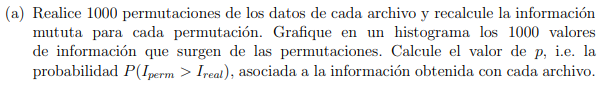

In [13]:
names={'1':'AG1','3':'AG3','5':'AG5'}

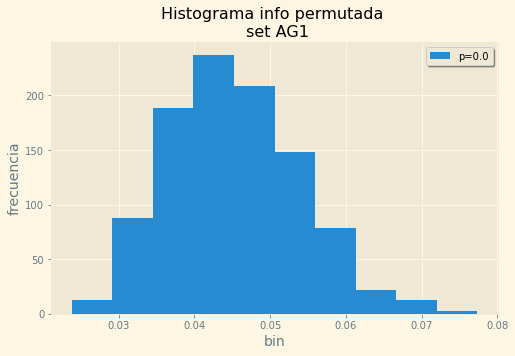

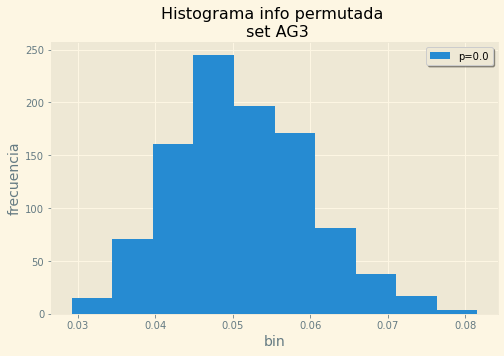

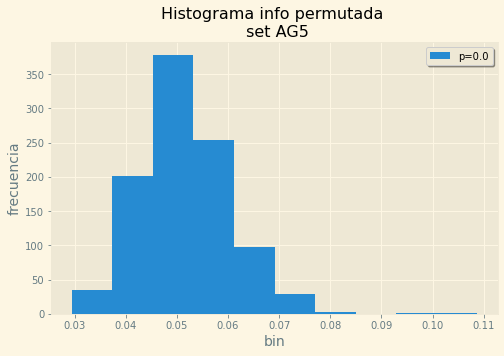

In [14]:
for neuron in llaves:
    i_real=informacion(Arch[neuron],llaves2,pest)
    i_permutada=permutacion(Arch[neuron],llaves2,pest)
    p=np.sum(i_permutada>i_real)/len(i_permutada)
    fig = plt.figure(figsize=(8,5))
    plt.hist(i_permutada,label='p='+str(p))
    plt.xlabel("bin",fontsize=14)
    plt.ylabel("frecuencia",fontsize=14)
    plt.title("Histograma info permutada "+'\n set '+names[neuron])
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show() 

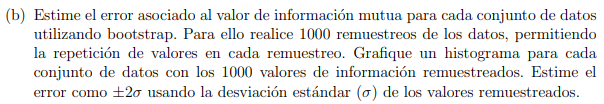

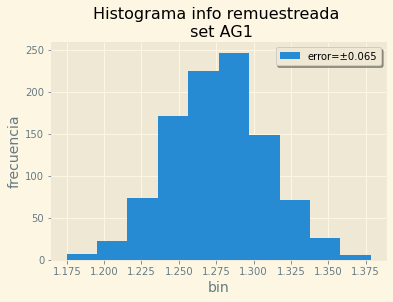

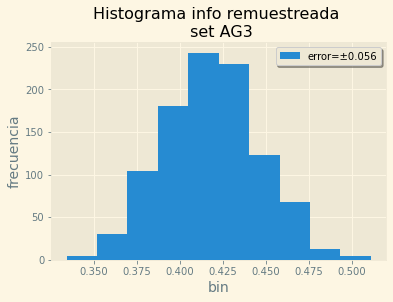

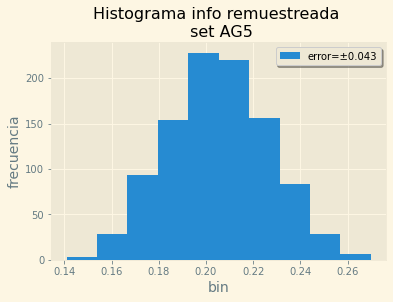

In [15]:
for neuron in llaves:
    i_real=informacion(Arch[neuron],llaves2,pest)
    i_remuestreada=remuestreo(Arch[neuron],llaves2,pest)
    sigma=np.std(i_remuestreada)
    plt.hist(i_remuestreada,label='error=±{:.3f}'.format(2*sigma))
    plt.xlabel("bin",fontsize=14)
    plt.ylabel("frecuencia",fontsize=14)
    plt.title("Histograma info remuestreada "+'\n set '+names[neuron])
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show() 

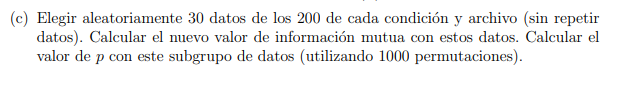

In [16]:
def subgrupos(data,condiciones,sub=30):
    nc=len(condiciones)
    new_data= []
    indices=[np.random.choice(data.shape[1],size=(sub),replace=False) for i in range(nc)]
    for i in range(nc):
        new_data.append((data[i][indices[i]]))
        
    return new_data

In [17]:
Arch2={llave:subgrupos(Arch[llave],llaves2) for llave in llaves}#diccionario de neuronas(datos sínteticos)

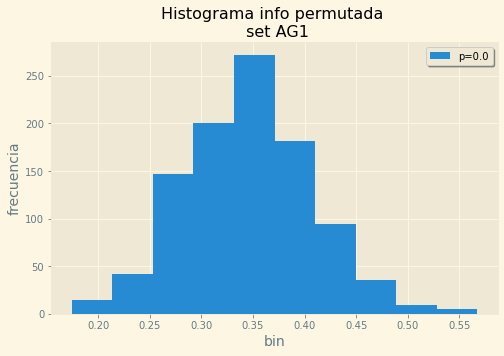

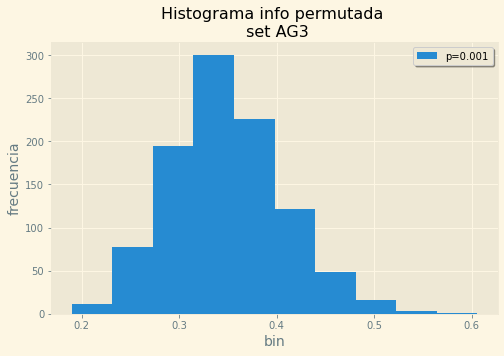

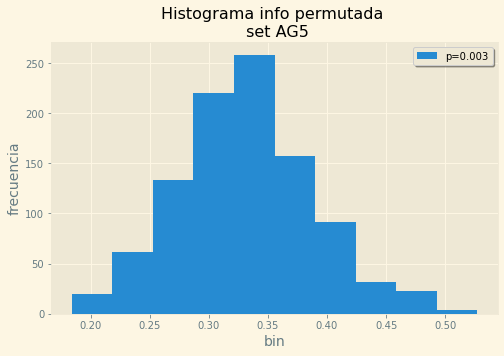

In [18]:
for neuron in llaves:
    i_real=informacion(np.array(Arch2[neuron]),llaves2,pest)
    i_permutada=permutacion(np.array(Arch2[neuron]),llaves2,pest)
    p=np.sum(i_permutada>i_real)/len(i_permutada)
    fig = plt.figure(figsize=(8,5))
    plt.hist(i_permutada,label='p='+str(p))
    plt.xlabel("bin",fontsize=14)
    plt.ylabel("frecuencia",fontsize=14)
    plt.title("Histograma info permutada "+'\n set '+names[neuron])
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show() 

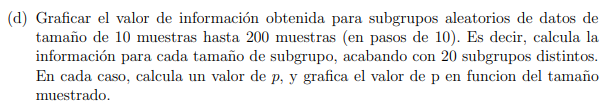

In [20]:
subgr=[n for n in range(10,200+10,10)]

In [21]:
p_sub=[[]for neuron in llaves]
infos_sub=[[]for neuron in llaves]
for sub in subgr:
    Archn={llave:subgrupos(Arch[llave],llaves2,sub) for llave in llaves}#diccionario de neuronas(datos sínteticos)
    for i in range(len(llaves)):
        i_real=informacion(np.array(Archn[llaves[i]]),llaves2,pest)
        i_permutada=permutacion(np.array(Archn[llaves[i]]),llaves2,pest)
        p=np.sum(i_permutada>i_real)/len(i_permutada)
        p_sub[i].append(p)
        infos_sub[i].append(i_real)

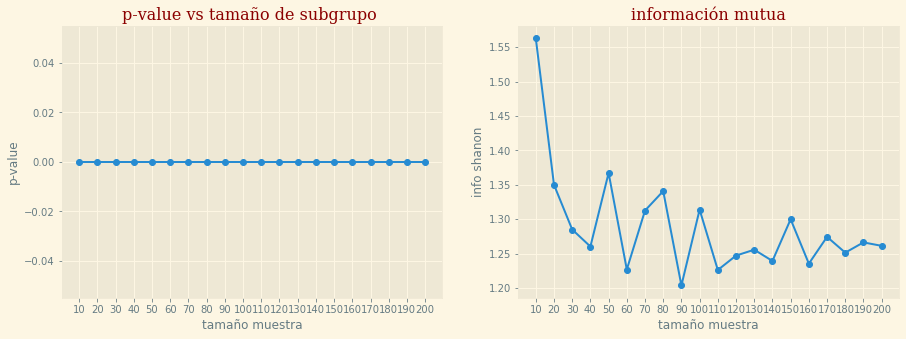

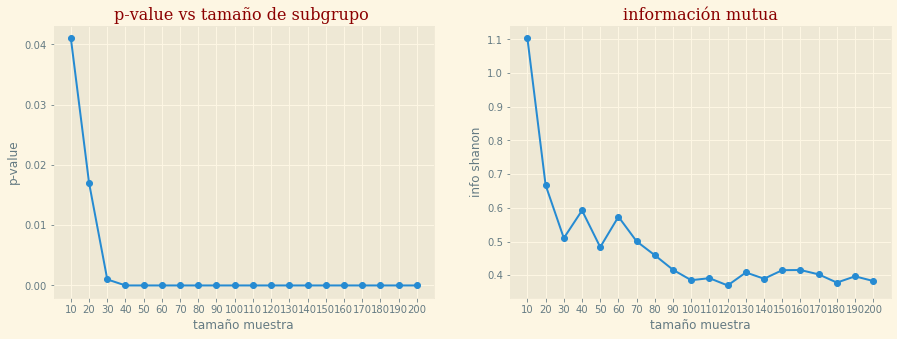

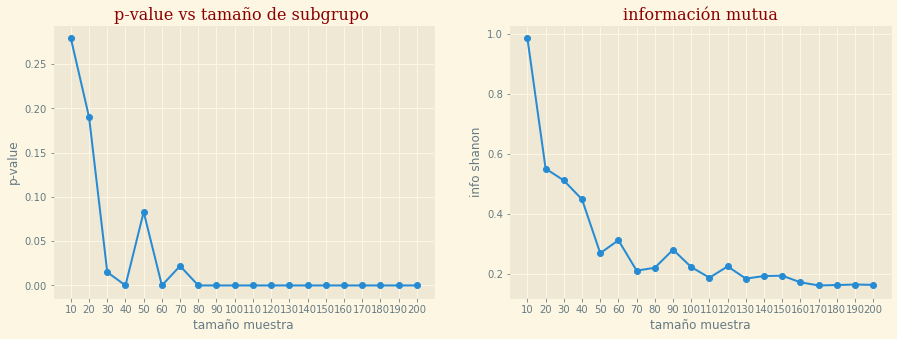

In [22]:
for i in range(3):
    fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,} # formato para el título
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(15,5))
    ax1.scatter(subgr,p_sub[i])
    ax1.plot(subgr,p_sub[i])
    ax1.set_xticks(subgr)
    ax1.set_ylabel('p-value')
    ax1.set_xlabel('tamaño muestra')
    ax1.set_title('p-value vs tamaño de subgrupo ', fontdict_title) 
    ax2.scatter(subgr,infos_sub[i])
    ax2.plot(subgr,infos_sub[i])
    ax2.set_xticks(subgr)
    ax2.set_ylabel('info shanon')
    ax2.set_xlabel('tamaño muestra')
    ax2.set_title('información mutua', fontdict_title) 